In [136]:
import numpy as np
import pandas as pd
from preprocess import merge_parquets, sample_dat, drop_missing_vals
from visualize import boxplot, heatmap, lineplot, barplot_with_annotations,plot_bar
from modeling import decompose

In [138]:
print("### Data Preprocessing")

# Load and merge data
dir = '../data'
print("Merging parquet files...")
dat = merge_parquets(dir)

### Data Preprocessing
Merging parquet files...
data.parquet already exists. Loading the file...


In [140]:
# Sample 30% of the data for efficiency
print("Sampling 30% of the data...")
sampled_dat = sample_dat(dat, 0.3, seed=1)


Sampling 30% of the data...


In [142]:
# Drop rows with missing values in critical columns
print("Dropping rows with missing values...")
sampled_dat = drop_missing_vals(sampled_dat, ['total_amount', 'passenger_count', 'trip_distance'])


Dropping rows with missing values...


In [144]:
# Converting passenger_count to integer type 
sampled_dat['passenger_count'] = pd.to_numeric(sampled_dat['passenger_count'], errors='coerce')
sampled_dat = sampled_dat.dropna(subset=['passenger_count'])
sampled_dat['passenger_count'] = sampled_dat['passenger_count'].astype(int)


In [146]:
# Filter out invalid passenger counts
valid_passenger_counts = [1, 2, 3, 4, 5, 6]
sampled_dat = sampled_dat[sampled_dat['passenger_count'].isin(valid_passenger_counts)]


In [164]:
# Section 2: Analysis
print("Analysis")
print("Impact of Passenger Count on Total Fare")
fare_analysis = sampled_dat.groupby('passenger_count')['total_amount'] \
                           .agg(['mean', 'median', 'count']) \
                           .reset_index() 
print("Fare Analysis (Filtered):")
print(fare_analysis)

print(fare_analysis.columns)


Analysis
Impact of Passenger Count on Total Fare
Fare Analysis (Filtered):
   passenger_count       mean  median    count
0                1  28.214118   20.90  8260780
1                2  32.009087   21.89  1663793
2                3  32.299095   21.84   413057
3                4  33.404994   22.54   233765
4                5  28.262979   21.00   143907
5                6  27.925736   20.93    94868
Index(['passenger_count', 'mean', 'median', 'count'], dtype='object')


Visualization


/Users/omni/DS1007_FinalProject/code/visualize.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= xvar, y= yvar, data = dat, palette='Set3', order = x_order)


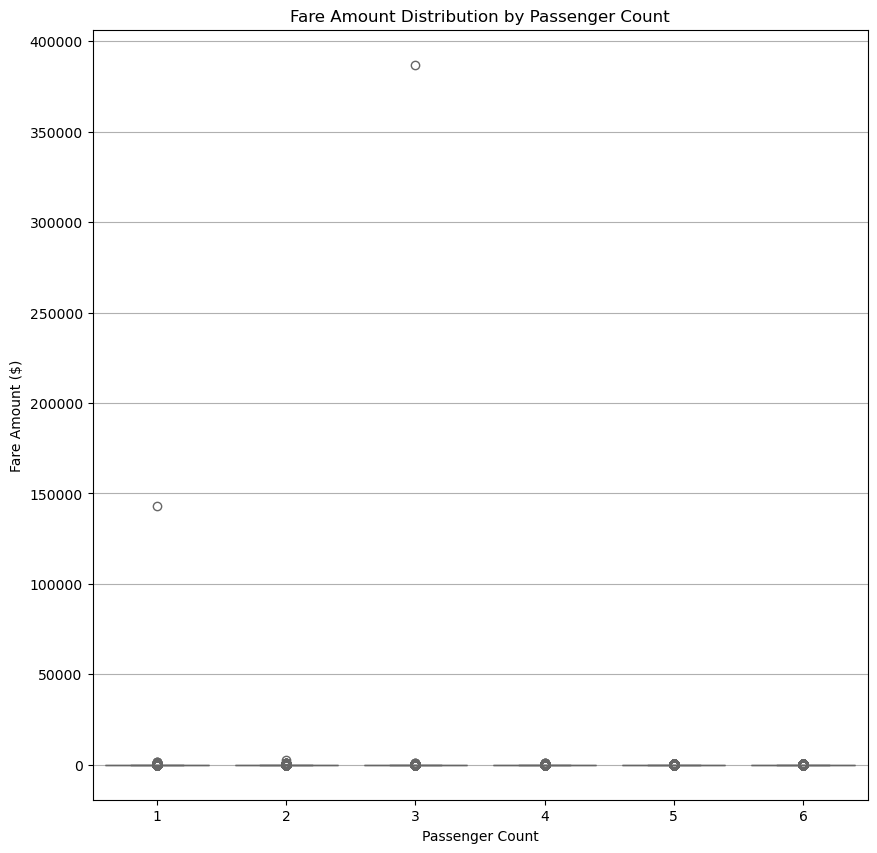

In [166]:
print("Visualization")
# Boxplot: Fare Distribution by Passenger Count
boxplot(dat=sampled_dat, xvar='passenger_count', yvar='total_amount', title='Fare Amount Distribution by Passenger Count', xlabel='Passenger Count', ylabel='Fare Amount ($)')

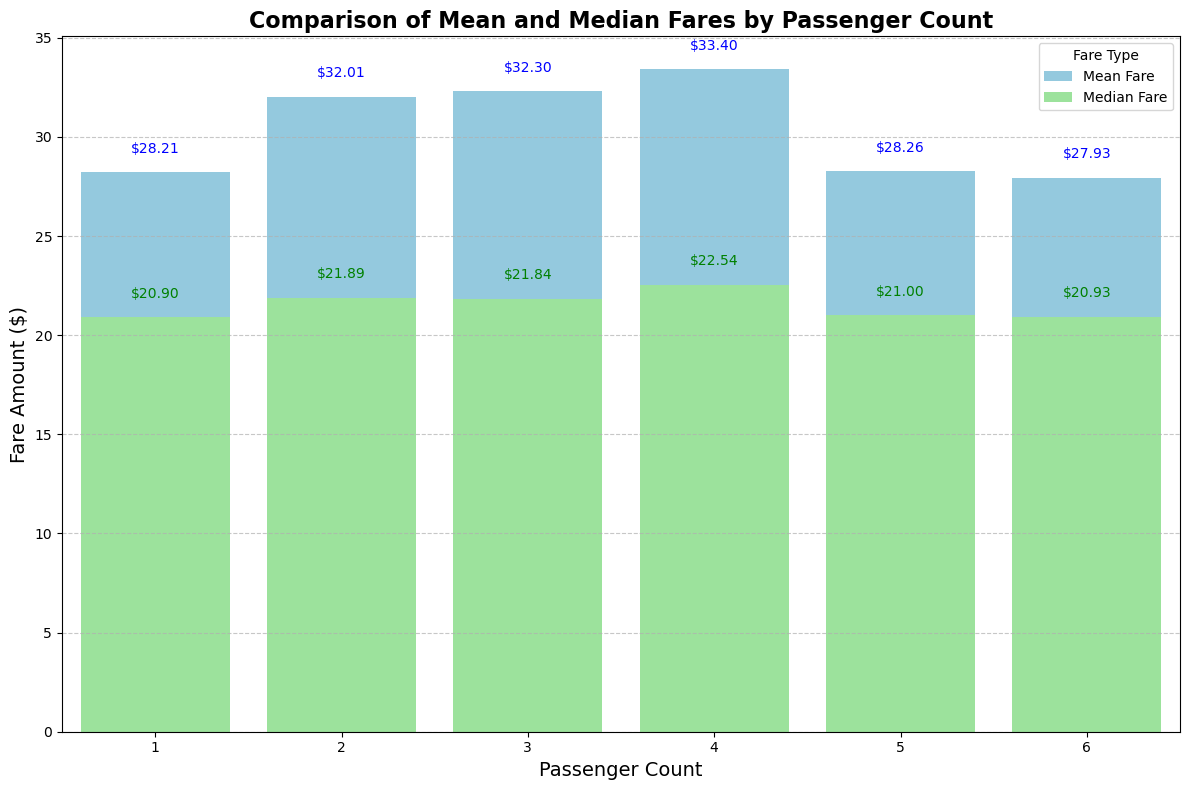

In [168]:
barplot_with_annotations(
    data=fare_analysis,
    x='passenger_count',
    mean_col='mean',
    median_col='median',
    title='Comparison of Mean and Median Fares by Passenger Count',
    xlabel='Passenger Count',
    ylabel='Fare Amount ($)'
)

/Users/omni/DS1007_FinalProject/code/visualize.py:99: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data,x=x,y=y,hue=hue, palette="tab10",linewidth=2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


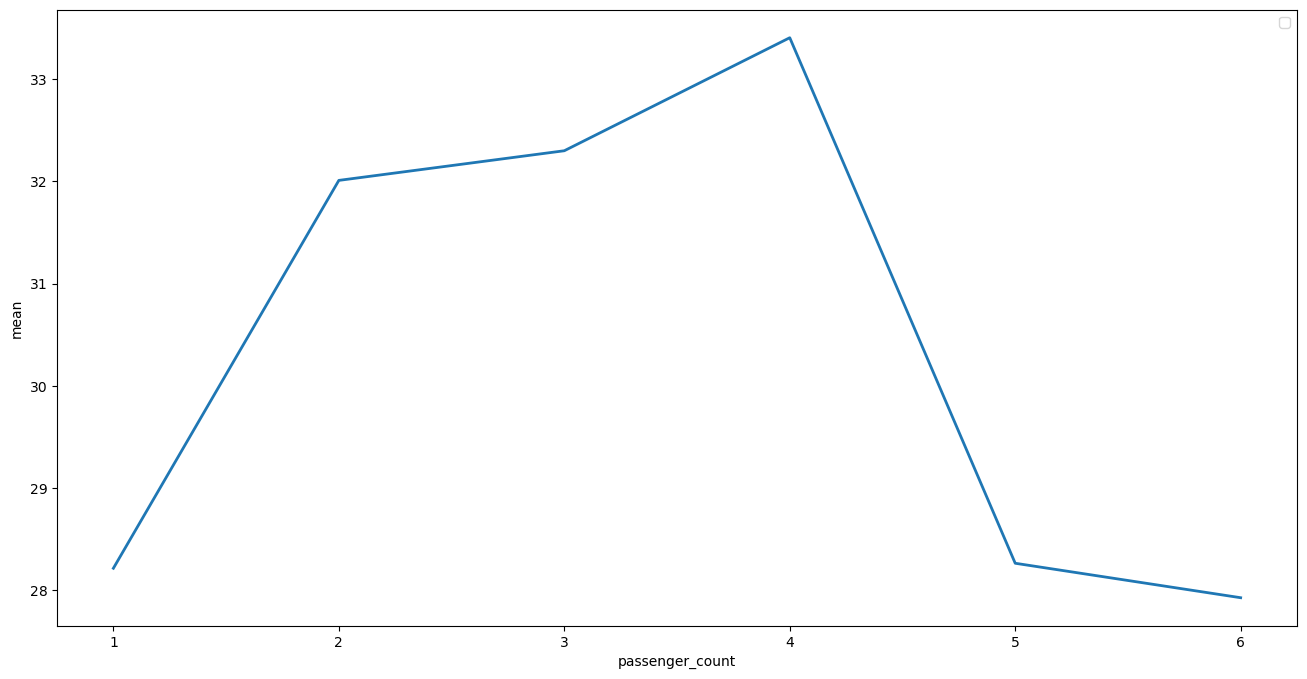

In [170]:
lineplot(
    x='passenger_count',
    y='mean',
    title='Trends in Mean and Median Fares by Passenger Count',
    xlabel='Passenger Count',
    ylabel='Fare Amount ($)',
    use_seaborn=True,
    data=fare_analysis,
    hue=None  # Set `hue` if grouping is required
)

In [172]:
print(fare_analysis.columns)


Index(['passenger_count', 'mean', 'median', 'count'], dtype='object')


In [174]:
print(fare_analysis.head())


   passenger_count       mean  median    count
0                1  28.214118   20.90  8260780
1                2  32.009087   21.89  1663793
2                3  32.299095   21.84   413057
3                4  33.404994   22.54   233765
4                5  28.262979   21.00   143907


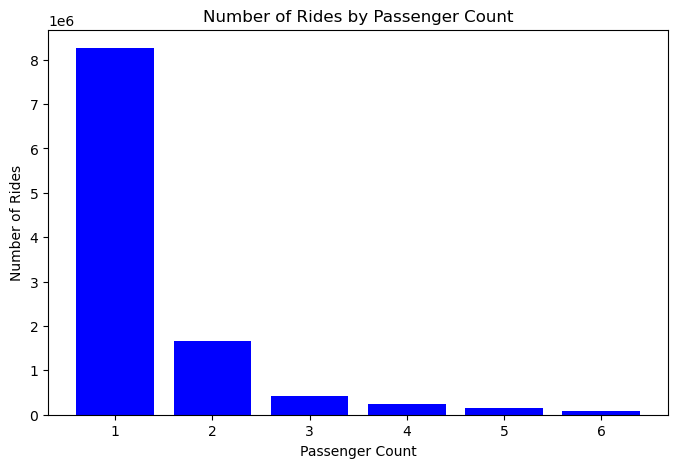

In [176]:
plot_bar(
    data=fare_analysis,
    x='passenger_count',
    y='count',
    title='Number of Rides by Passenger Count',
    xlabel='Passenger Count',
    ylabel='Number of Rides'
)

# Insights from Fare Analysis

### Key Observations:
1. **Passenger Count Distribution**:
   - The data includes rides with passenger counts ranging from 1 to 6.
   - Single-passenger rides are the most common, making up a significant majority of the trips.

2. **Mean and Median Fare Comparison**:
   - The **mean fare** is consistently higher than the **median fare** across all passenger counts.
   - This indicates a right-skewed distribution, likely caused by outliers such as long-distance trips or premium services.

3. **Fare Trends by Passenger Count**:
   - **Mean Fare**:
     - Increases with passenger count, peaking at 4 passengers with $33.40.
       
     - Declines slightly for 5 and 6 passengers, suggesting flat-rate policies, pooling, or ride-sharing discounts.
       
     - This suggests that the passenger count has a minimal impact on the mean fare. 
   - **Median Fare**:
     - Follows a similar trend but remains lower than the mean, reflecting typical ride costs for most passengers.
     - Peaks at 4 passengers with $22.54.

4. **Ride Counts by Passenger Count**:
   - Single-passenger rides dominate with over 8.2 million trips.
   - The number of rides decreases as the passenger count increases, with only ~95,000 trips for 6 passengers.
  
5. **Fare Distribution**:
- Visualizing the distribution of fares further supports the idea that passenger count does not dramatically influence fare.
- The distribution of fares by passenger count shows that most rides, regardless of the number of passengers, tend to cluster around a similar price range, with the occasional presence of outliers (higher fares) that skew the mean upward.